In [1]:
import kagglehub
import pandas as pd
import os
import shutil

path = kagglehub.dataset_download("blastchar/telco-customer-churn")

local_path = "../data/raw_churn_data.csv"
os.makedirs("../data", exist_ok=True)
shutil.copy(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv", local_path)


/Users/rohitnairp/cust-churn-prediction-ai-ml/customer-churn-agentic-retention-system/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'../data/raw_churn_data.csv'

## **Read the csv** 

In [2]:
df = pd.read_csv(local_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

## **Step1**: *Remove the null values*  

In [4]:
print(df['TotalCharges'])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: str


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Number of missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")
print(f"Number of values in TotalCharges: {len(df['TotalCharges'])}")

Number of missing values in TotalCharges: 11
Number of values in TotalCharges: 7043


In [6]:
df.dropna(subset=['TotalCharges'], inplace=True) # (only 11 rows, <0.2% of data)
print(f"Number of missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")
print(f"Total rows remaining: {len(df['TotalCharges'])}")


Number of missing values in TotalCharges: 0
Total rows remaining: 7032


In [7]:
df.drop('customerID', axis=1, inplace=True, errors='ignore') # id not required for analysis and modelling

### Visualizing the Distribution of Total Charges

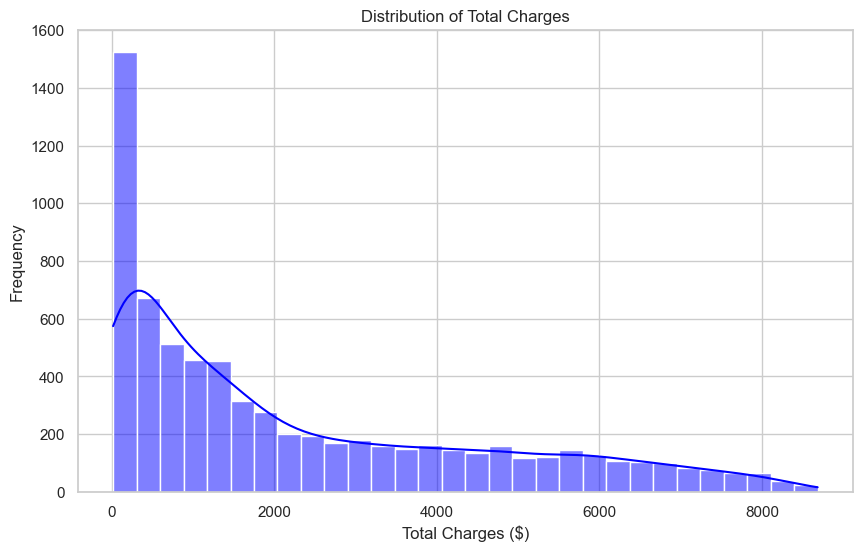

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], kde=True, color='blue', bins=30)

plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.show()

### **Boxplot**: Checking for Outliers

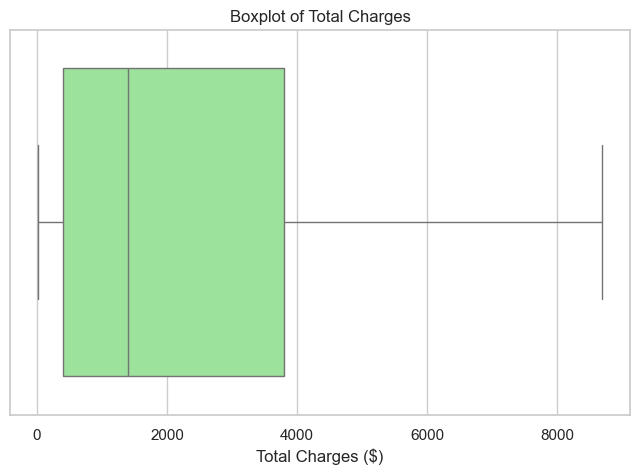

In [9]:
plt.figure(figsize=(8, 5)) 
sns.boxplot(x=df['TotalCharges'], color='lightgreen') 
plt.title('Boxplot of Total Charges') 
plt.xlabel('Total Charges ($)') 
plt.show()

## **Step2**: *Encoding*

### Binary Encoding

In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
cols_to_fix = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'gender']


for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0})

for col in cols_to_fix:
    df[col] = df[col].astype(int)
    
# Checking binary columns are they numerical or object
print(df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender', 'Churn']].dtypes)

df[cols_to_fix].head()

Partner             int64
Dependents          int64
PhoneService        int64
PaperlessBilling    int64
gender              int64
Churn               int64
dtype: object


,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender
0,1,0,0,1,0,1
1,0,0,1,0,0,0
2,0,0,1,1,1,0
3,0,0,0,0,0,0
4,0,0,1,1,1,1
